In [ ]:
from pyVHR.analysis.pipeline import Pipeline
from realtime_pipeline import Realtime_Pipeline
import matplotlib.pyplot as plt
import numpy
realtime_pipe = Realtime_Pipeline()

# Execution Time Comparison

bpm 48.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 54.0
bpm 48.0
bpm 54.0
bpm 54.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 54.0
bpm 48.0
bpm 48.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 48.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 54.0
bpm 48.0
bpm 48.0


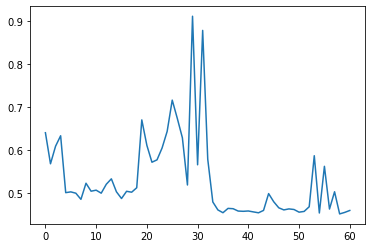

mean_execution_time: 0.5306991944547559


In [14]:
import statistics
holistic_skin_extraction_execution_times = realtime_pipe.run_realtime_pipeline(is_test=True, output='skin_extraction_execution_times', advanced_skin_extraction=True)
plt.figure()
plt.plot(holistic_skin_extraction_execution_times)
plt.show()
print('mean_execution_time:', statistics.mean(holistic_skin_extraction_execution_times))

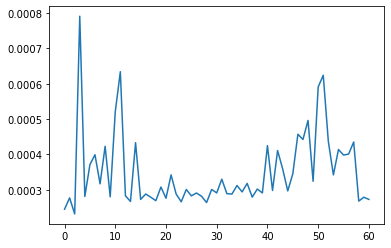

mean_execution_time: 0.0003504088667572522


In [7]:
basic_skin_extraction_execution_times = realtime_pipe.run_realtime_pipeline(is_test=True, output='skin_extraction_execution_times', advanced_skin_extraction=False)
plt.figure()
plt.plot(basic_skin_extraction_execution_times)
plt.show()
print('mean_execution_time:', statistics.mean(basic_skin_extraction_execution_times))

# Skin Extraction Pixels Comparison (RGB Signal)

bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 48.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 42.00000000000001
bpm 42.00000000000001
bpm 48.0
bpm 48.0
bpm 48.0
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 48.0
bpm 42.00000000000001
bpm 42.00000000000001
bpm 48.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 48.0
bpm 42.00000000000001
bpm 48.0
bpm 48.0
bpm 48.0
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001
bpm 42.00000000000001


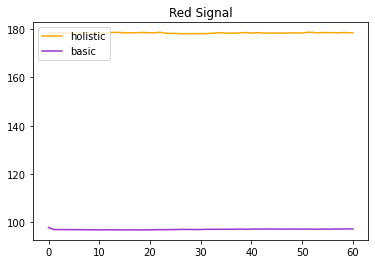

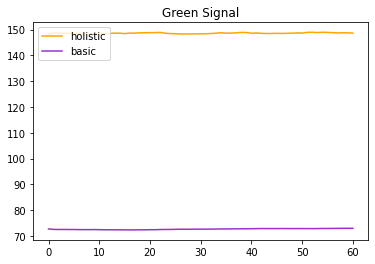

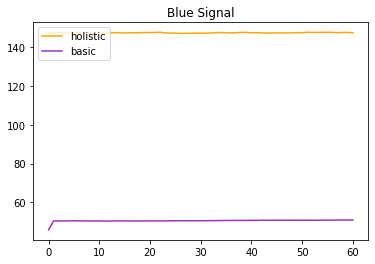

In [5]:
realtime_pipe = Realtime_Pipeline()
holistic_RGB_signal = realtime_pipe.run_realtime_pipeline(is_test=True, output='mean_colors', advanced_skin_extraction=True)
basic_RGB_signal = realtime_pipe.run_realtime_pipeline(is_test=True, output='mean_colors', advanced_skin_extraction=False)
R_holistic = [x[0] for x in holistic_RGB_signal]
G_holistic = [x[1] for x in holistic_RGB_signal]
B_holistic= [x[2] for x in holistic_RGB_signal]
R_basic = [x[0] for x in basic_RGB_signal]
G_basic = [x[1] for x in basic_RGB_signal]
B_basic= [x[2] for x in basic_RGB_signal]

plt.figure()
plt.plot(R_holistic, 'orange', label='holistic')
plt.plot(R_basic, 'darkorchid', label='basic')
plt.title('Red Signal')
plt.legend(loc="upper left")
plt.show()

plt.plot(G_holistic, 'orange', label='holistic')
plt.plot(G_basic, 'darkorchid', label='basic')
plt.title('Green Signal')
plt.legend(loc="upper left")
plt.show()

plt.plot(B_holistic, 'orange', label='holistic')
plt.plot(B_basic, 'darkorchid', label='basic')
plt.title('Blue Signal')
plt.legend(loc="upper left")
plt.show()

delta_e_mean 75.3412560555469


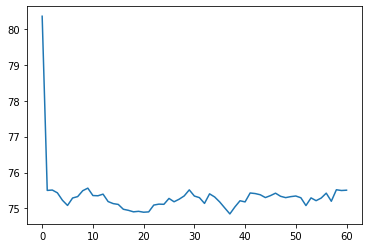

In [6]:
from colormath.color_objects import LabColor, sRGBColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

# convert mean_color values to a color space
holistic_LAB_color_space = [convert_color(sRGBColor(item[0], item[1], item[2]), LabColor) for item in holistic_RGB_signal]
basic_LAB_color_space = [convert_color(sRGBColor(item[0], item[1], item[2]), LabColor) for item in basic_RGB_signal]
# delta_e describes the percievable defference between two colors. 0 means colors are identical, 100 means colors are opposites
delta_e_list = [delta_e_cie2000(x, y) for (x, y) in zip(holistic_LAB_color_space, basic_LAB_color_space)]
print('delta_e_mean', statistics.mean(delta_e_list))
plt.plot(delta_e_list)
plt.show()

# Accuracy Comparison

In [2]:
hr_predicted_basic = realtime_pipe.run_realtime_pipeline(is_test=False, output='bpm', advanced_skin_extraction=False)
print('return_len', (len(hr_predicted_basic)))
plt.plot(hr_predicted_basic)

TypeError: Cannot interpret '300' as a data type

In [ ]:
hr_pos_predicted_basic = realtime_pipe.run_realtime_pipeline(is_test=False, output='pulse_signal', advanced_skin_extraction=False)
plt.plot(hr_pos_predicted_basic)

In [8]:
import numpy as np
a = [1,2,3]
a = np.append(a, 2)
print(a)

[1 2 3 2]


In [ ]:
import utils_realtime, time
next = True
cap = utils_realtime.RecordingReader()
count = 0
while(next):
    success, frame = cap.read()
    count += 1
    next = success
print(count)
cap.reset()

In [ ]:
hr_predicted_advanced = realtime_pipe.run_realtime_pipeline(is_test=False, output='bpm', advanced_skin_extraction=True)
plt.plot(hr_predicted_advanced)

### Ground Truth

2022


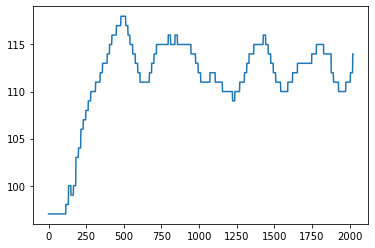

In [8]:
import statistics
gtdata = numpy.loadtxt('UBFC2_subject8/ground_truth.txt')
gtTrace = gtdata[0,:]
gtTime = gtdata[2,:]
gtHR = gtdata[1,:]
gtTrace = gtTrace - statistics.mean(gtTrace)
gtTrace = gtTrace / statistics.stdev(gtTrace)
print(len(gtHR))
plt.plot(gtHR)

In [7]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(hr_predicted_basic, gtHR[:1546])
print(rmse)

3999.7990245006467
